In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('coefficient.xlsx')
df

,Unnamed: 0,blood,skin,Fat,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,blood.1,skin.1,Fat.1
0,Frequency(THz),refractive index,NaN,NaN,NaN,NaN,NaN,Frequency(THz),absorption coefficient(mm^-1),NaN,NaN
1,0.2,2.7108,2.487803,2.0305,NaN,NaN,NaN,0.2,11.7758,7.240005,4.0489
2,0.4,2.2105,2.246139,1.9319,NaN,NaN,NaN,0.4,16.0218,9.490481,5.8964
3,0.6,2.0427,2.165657,1.8659,NaN,NaN,NaN,0.6,18.6761,11.736955,8.0317
4,0.8,1.9573,2.111387,1.8101,NaN,NaN,NaN,0.8,20.9721,14.240531,10.0315
5,1,1.9013,2.065012,1.7649,NaN,NaN,NaN,1,23.1726,16.846053,11.7077
6,1.2,1.8588,2.023375,1.7295,NaN,NaN,NaN,1.2,25.3088,19.394905,13.0432
7,1.4,1.8239,1.986050,1.7021,NaN,NaN,NaN,1.4,27.3544,21.781510,14.0876
8,1.6,1.794,1.952969,1.6809,NaN,NaN,NaN,1.6,29.2782,23.951465,14.8994
9,1.8,1.7681,1.923947,1.6644,NaN,NaN,NaN,1.8,31.0583,25.887087,15.5355


# Frequency vs Reactive Index (blood tissue)

In [3]:
x = np.array(df.values[1:, 0]).reshape(-1,1)
y = np.array(df.values[1:, 1])
print(x)
print(y)

[[0.2]
 [0.4]
 [0.6]
 [0.8]
 [1]
 [1.2]
 [1.4]
 [1.6]
 [1.8]
 [2]]
[2.7108 2.2105 2.0427 1.9573 1.9013 1.8588 1.8239 1.794 1.7681 1.7454]


In [4]:
model = LinearRegression().fit(x,y)
variance = model.score(x,y)
print("variance(R^2): ",variance)
print("intercept: ", model.intercept_)
print("slope: ", model.coef_)
y_prediction = model.predict(x)
print(y_prediction)

variance(R^2):  0.7129134230118614
intercept:  2.430333333333334
slope:  [-0.4082303]
[2.34868727 2.26704121 2.18539515 2.10374909 2.02210303 1.94045697
 1.85881091 1.77716485 1.69551879 1.61387273]


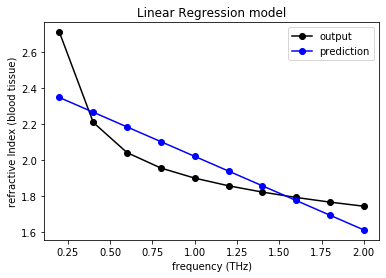

In [5]:
plt.plot(x, y, 'ko-', label='output' )
plt.plot(x, y_prediction, 'bo-', label="prediction" )
plt.xlabel('frequency (THz)')
plt.ylabel('refractive Index (blood tissue)')
plt.title('Linear Regression model')
plt.legend()
plt.savefig('plot.png')
plt.show()

## Frequency vs Absorption Coefficient (blood tissue)

In [6]:
x_freq = np.array(df.values[1:, 0]).reshape(-1,1)
y_absorb = np.array(df.values[1:, 8])
print(x_freq)
print(y_absorb)

[[0.2]
 [0.4]
 [0.6]
 [0.8]
 [1]
 [1.2]
 [1.4]
 [1.6]
 [1.8]
 [2]]
[11.7758 16.0218 18.6761 20.9721 23.1726 25.3088 27.3544 29.2782 31.0583
 32.6847]


In [7]:
model = LinearRegression().fit(x_freq,y_absorb)
variance1 = model.score(x_freq,y_absorb)
print("variance(R^2): ",variance1)
print("intercept: ", model.intercept_)
print("slope: ", model.coef_)
y_prediction1 = model.predict(x_freq)
print("y prediction: ",y_prediction1)

variance(R^2):  0.9850751552173891
intercept:  11.372639999999999
slope:  [11.14330909]
y prediction:  [13.60130182 15.82996364 18.05862545 20.28728727 22.51594909 24.74461091
 26.97327273 29.20193455 31.43059636 33.65925818]


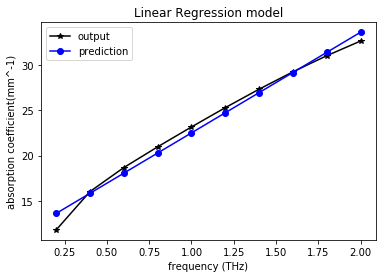

In [8]:
plt.plot(x_freq, y_absorb, 'k*-', label='output' )
plt.plot(x_freq, y_prediction1, 'bo-', label="prediction" )
plt.xlabel('frequency (THz)')
plt.ylabel('absorption coefficient(mm^-1)')
plt.title('Linear Regression model')
plt.legend()
plt.savefig('plot.png')
plt.show()